In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

**Part 1**

*Import the raw data set into a Pandas DataFrame.*

In [143]:
animals = pd.read_csv('2021-11-ml-09-k-means-animals-dataset.csv')

**Part 2**

*Follow the steps in the lesson to prepare the data set for K-means clustering.*

In [144]:
# Dropping the categorical variables to standardize
animals = animals.drop(columns = {'Region', 'Stage', 'Individual ID', 'Comments'}).copy()
# Filling the NA values with the median value of each column
animals = animals.fillna({'Culmen Length (mm)':animals['Culmen Length (mm)'].median(), 'Culmen Depth (mm)':animals['Culmen Depth (mm)'].median(), 'Flipper Length (mm)':animals['Flipper Length (mm)'].median(), 'Body Mass (g)':animals['Body Mass (g)'].median(), 'Delta 15 N (o/oo)':animals['Delta 15 N (o/oo)'].median(), 'Delta 13 C (o/oo)':animals['Delta 13 C (o/oo)'].median()})

In [151]:
# Standardizing each column within the animals dataframe
scalar = StandardScaler()
for i in animals.columns:
    animals[i] = scalar.fit_transform(animals[[i]])
animals

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
0,-0.887622,0.787289,-1.420541,-0.564625,-0.143896,-0.182055
1,-0.814037,0.126114,-1.063485,-0.502010,0.406551,1.281659
2,-0.666866,0.431272,-0.420786,-1.190773,-0.670335,0.461143
3,0.096581,0.075255,-0.277964,-0.188936,-0.143896,-0.182055
4,-1.329133,1.092447,-0.563608,-0.940314,0.067471,0.472400
...,...,...,...,...,...,...
339,0.096581,0.075255,-0.277964,-0.188936,-0.143896,-0.182055
340,0.528894,-1.450534,1.007436,0.812900,-0.590127,-0.573756
341,1.191161,-0.738500,1.507314,1.939966,-0.793612,-0.448907
342,0.234553,-1.196236,0.793203,1.251204,-0.903273,-0.549814


**Part 3**

*Create a model for each value of K from 2 through 5, inclusive. Create a scatterplot for each model, using color to distinguish between clusters.*

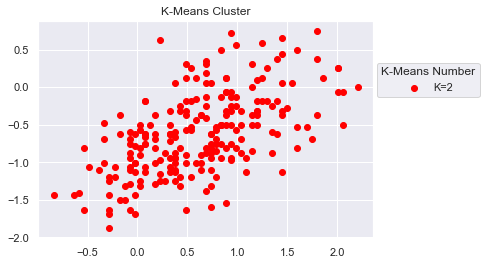

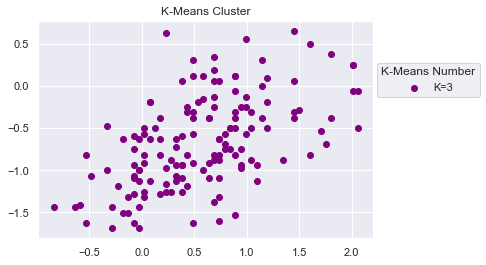

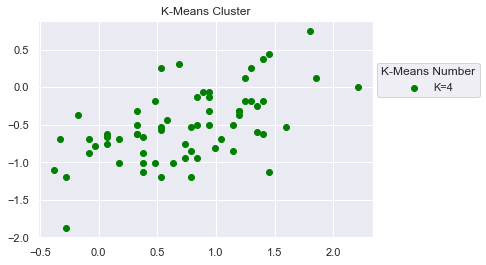

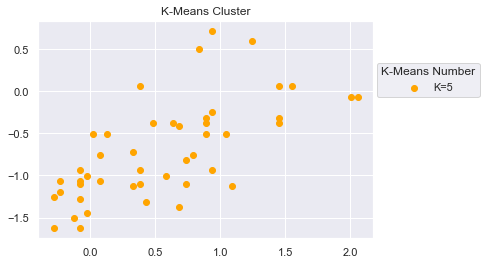

In [219]:
sns.set_theme(style = 'darkgrid')
colors = {2:'red', 3:'purple', 4:'green', 5:'orange'}
for k in range(2, 6):
    k_means = KMeans(n_clusters = k, random_state=0)
    label = k_means.fit_predict(animals)
    filtered_label = animals[label == 0]
    plt.scatter(filtered_label['Culmen Depth (mm)'], filtered_label['Body Mass (g)'], c = colors[k])
    plt.title('K-Means Cluster')
    plt.legend(labels = [f'K={k}'], title = 'K-Means Number', loc = (1.01,.65))
    plt.show()

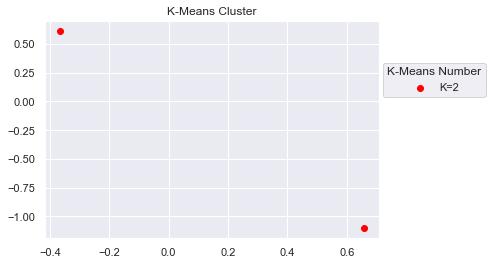

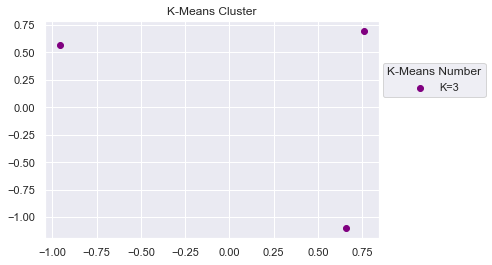

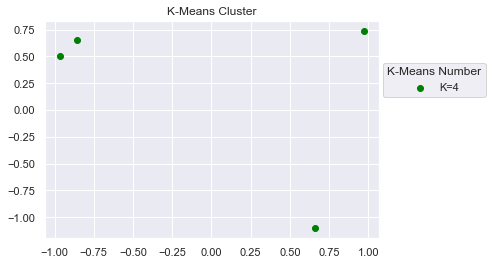

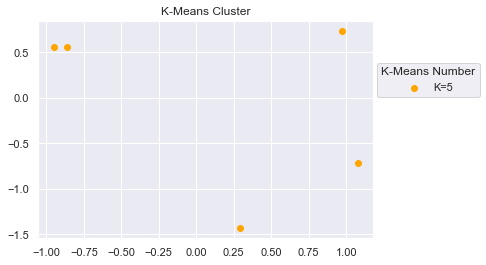

In [222]:
# Since there are multiple columns, unsure of which code is correct
sns.set_theme(style = 'darkgrid')
colors = {2:'red', 3:'purple', 4:'green', 5:'orange'}
for k in range(2, 6):
    k_means = KMeans(n_clusters = k, random_state=0).fit(animals)
    clusters = k_means.cluster_centers_
    plt.scatter(clusters[:,0], clusters[:,1], c = colors[k])
    plt.title('K-Means Cluster')
    plt.legend(labels = [f'K={k}'], title = 'K-Means Number', loc = (1.01,.65))
    plt.show()

**Part 4**

*Create additional models for K=6 through K=9, inclusive. Then generate a scree plot for all 8 models you've created. (Hint: use the .inertia_ attribute of your K-means instance as your vertical axis values.) Judging from the scree plot, what appears to be a reasonable choice of K for this data set?*

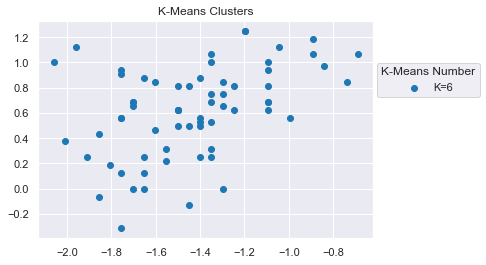

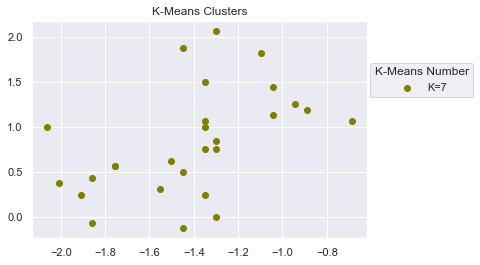

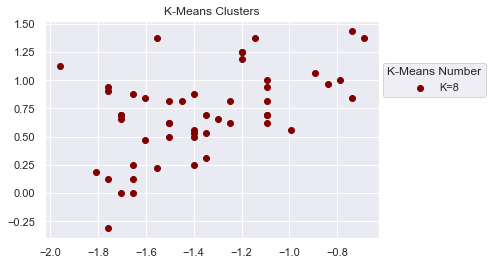

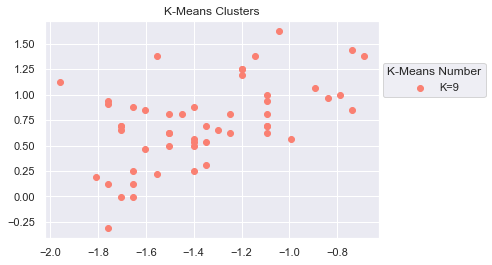

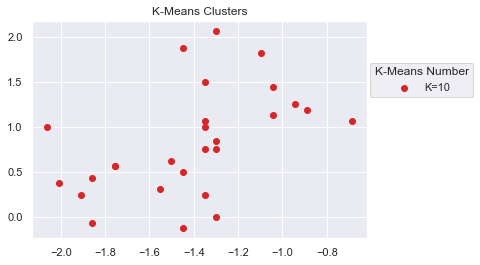

In [216]:
sns.set_theme(style = 'darkgrid')
colors = {6:'tab:blue', 7:'olive', 8:'maroon', 9:'salmon'}
for k in range(6, 10):
    k_means = KMeans(n_clusters = k, random_state=0)
    label = k_means.fit_predict(animals)
    filtered_label = animals[label == 0]
    plt.scatter(filtered_label['Culmen Depth (mm)'], filtered_label['Body Mass (g)'], c = colors[k])
    plt.title('K-Means Cluster')
    plt.legend(labels = [f'K={k}'], title = 'K-Means Number', loc = (1.01,.65))
    plt.show()

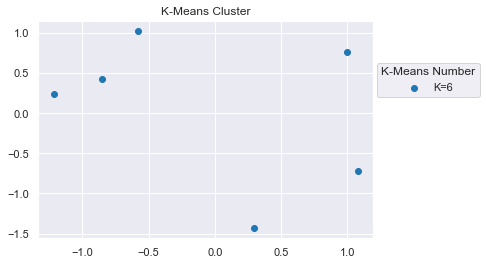

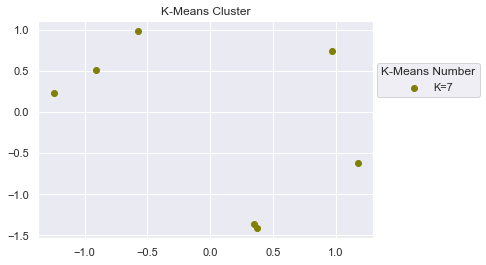

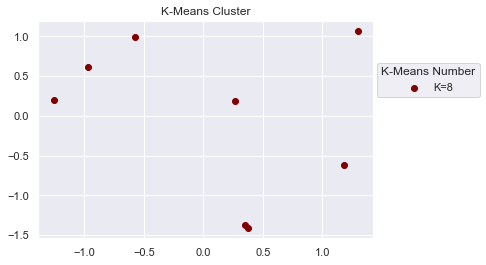

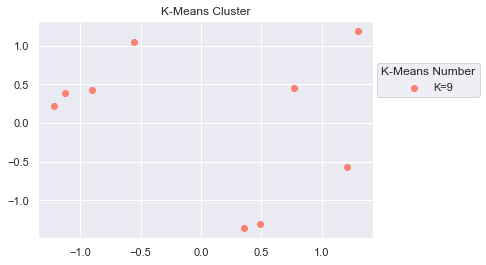

In [221]:
# Since there are multiple columns, unsure of which code is correct
sns.set_theme(style = 'darkgrid')
colors = {6:'tab:blue', 7:'olive', 8:'maroon', 9:'salmon'}
for k in range(6, 10):
    k_means = KMeans(n_clusters = k, random_state=0).fit(animals)
    clusters = k_means.cluster_centers_
    plt.scatter(clusters[:,0], clusters[:,1], c = colors[k])
    plt.title('K-Means Cluster')
    plt.legend(labels = [f'K={k}'], title = 'K-Means Number', loc = (1.01,.65))
    plt.show()

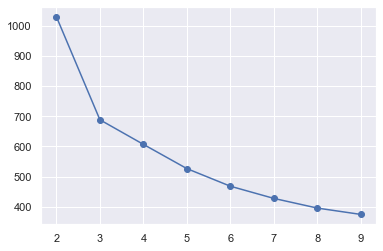

In [220]:
inertia_list = []
for k in range(2, 10):
    k_means = KMeans(n_clusters = k)
    k_means.fit(animals)
    inertia_list.append(k_means.inertia_)
plt.plot(range(2,10), inertia_list, '-o')
plt.show()

From the scree plot, K=3 seems to be a reasonable choice. 